In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy


In [2]:
from config import key_dict

if 'owm' in key_dict:
    owm_key = key_dict['owm']
else:
    owm_key = api_key

In [14]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [15]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [17]:
# Create row to process down the list
row_counter = 1
# Create a dictionary with parameters using api
settings = {"appid": owm_key, "units": "imperial"}
# Call the input URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# Create query url
query_url = f"{base_url}appid={settings['appid']}&units={settings['units']}&q="

In [64]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
print("Beginning Data Retrieval\n------------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | isabela
Processing Record 2 of Set 1 | isangel
Processing Record 3 of Set 1 | narsaq
Processing Record 4 of Set 1 | shimoda
Processing Record 5 of Set 1 | lavrentiya
Processing Record 6 of Set 1 | mataura
City not found. Skipping...
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | greenfield
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | port hedland
Processing Record 13 of Set 1 | richards bay
Processing Record 14 of Set 1 | bonthe
Processing Record 15 of Set 1 | labuhan
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | san quintin
Processing Record 18 of Set 1 | naze
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | torbay
Processing Record 23 of Set 1 

Processing Record 35 of Set 4 | kaitangata
Processing Record 36 of Set 4 | santa maria
Processing Record 37 of Set 4 | luebo
Processing Record 38 of Set 4 | barcelos
Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | new norfolk
Processing Record 41 of Set 4 | ust-tsilma
Processing Record 42 of Set 4 | san juan
Processing Record 43 of Set 4 | alta floresta
Processing Record 44 of Set 4 | beloha
Processing Record 45 of Set 4 | longyearbyen
Processing Record 46 of Set 4 | lebu
Processing Record 47 of Set 4 | mahibadhoo
City not found. Skipping...
Processing Record 48 of Set 4 | haikou
Processing Record 49 of Set 4 | nuuk
Processing Record 1 of Set 5 | chuy
Processing Record 2 of Set 5 | apollonia
Processing Record 3 of Set 5 | esperance
Processing Record 4 of Set 5 | bijar
Processing Record 5 of Set 5 | belaya gora
Processing Record 6 of Set 5 | maun
Processing Record 7 of Set 5 | hami
Processing Record 8 of Set 5 | rawson
Processing Record 9 of Set 5 | bethel
City not

Processing Record 27 of Set 8 | leningradskiy
Processing Record 28 of Set 8 | mianwali
City not found. Skipping...
Processing Record 29 of Set 8 | chara
Processing Record 30 of Set 8 | donskoye
City not found. Skipping...
Processing Record 31 of Set 8 | zaqatala
Processing Record 32 of Set 8 | kyzyl
Processing Record 33 of Set 8 | kemijarvi
Processing Record 34 of Set 8 | buchanan
Processing Record 35 of Set 8 | ivybridge
Processing Record 36 of Set 8 | rairangpur
Processing Record 37 of Set 8 | beira
Processing Record 38 of Set 8 | vestmannaeyjar
Processing Record 39 of Set 8 | umea
Processing Record 40 of Set 8 | port blair
Processing Record 41 of Set 8 | waipawa
Processing Record 42 of Set 8 | auki
Processing Record 43 of Set 8 | moba
Processing Record 44 of Set 8 | synya
City not found. Skipping...
Processing Record 45 of Set 8 | calama
Processing Record 46 of Set 8 | pacific grove
City not found. Skipping...
Processing Record 47 of Set 8 | kudahuvadhoo
Processing Record 48 of Set 

In [66]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

# establish dataframe
weather_df = pd.DataFrame(weather_dict)

In [67]:
weather_df.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [68]:
output_data_file = "output_data/cities.csv"
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,isabela,90,PH,1616295319,79,6.7085,121.9711,84.20,4.61
1,isangel,98,VU,1616295321,73,-19.5500,169.2667,81.14,12.41
2,narsaq,75,GL,1616295321,93,60.9167,-46.0500,32.00,11.50
3,shimoda,75,JP,1616295321,100,34.6667,138.9500,66.99,28.77
4,lavrentiya,100,RU,1616295322,81,65.5833,-171.0000,2.46,12.77
...,...,...,...,...,...,...,...,...,...
537,jawhar,46,SO,1616295575,86,2.7809,45.5005,76.78,8.37
538,aragats,40,AM,1616295575,93,40.4889,44.3528,37.40,2.30
539,matao,10,BR,1616295575,89,-21.6033,-48.3658,68.85,5.88
540,marawi,68,PH,1616295576,82,7.9986,124.2928,82.99,4.00


In [69]:
# Drop extra samples (500 total samples)

update_weather_df = weather_df.drop(weather_df.index[500:542])

update_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,isabela,90,PH,1616295319,79,6.7085,121.9711,84.20,4.61
1,isangel,98,VU,1616295321,73,-19.5500,169.2667,81.14,12.41
2,narsaq,75,GL,1616295321,93,60.9167,-46.0500,32.00,11.50
3,shimoda,75,JP,1616295321,100,34.6667,138.9500,66.99,28.77
4,lavrentiya,100,RU,1616295322,81,65.5833,-171.0000,2.46,12.77
...,...,...,...,...,...,...,...,...,...
495,mangrol,0,IN,1616295556,63,21.1167,70.1167,77.54,10.76
496,shubarshi,100,KZ,1616295557,95,48.5872,57.1869,21.06,7.09
497,taft,0,IR,1616295557,21,31.7471,54.2088,48.20,1.05
498,kenai,40,US,1616295557,58,60.5544,-151.2583,24.80,24.16


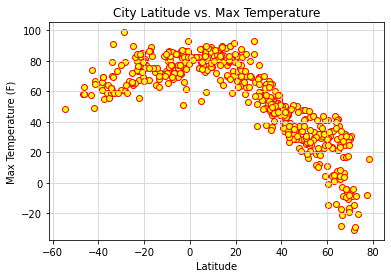

In [71]:
# Temp vs lat

plt.scatter(update_weather_df["Lat"],update_weather_df["Max Temp"],edgecolors="red",facecolors="yellow")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

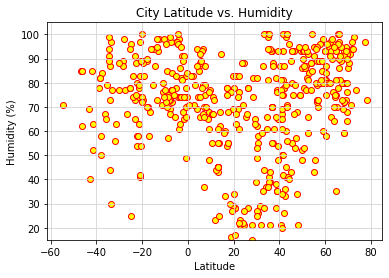

In [72]:
# Hum vs lat

plt.scatter(update_weather_df["Lat"],update_weather_df["Humidity"],edgecolors="red",facecolors="yellow")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

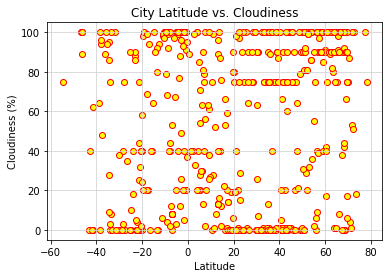

In [73]:
# Cloudiness vs Lat

plt.scatter(update_weather_df["Lat"],update_weather_df["Cloudiness"],edgecolors="red",facecolors="yellow")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

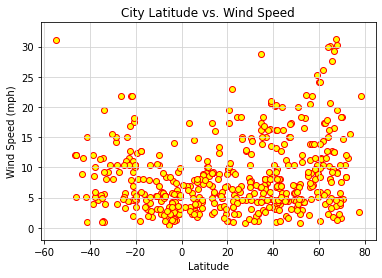

In [74]:
# Windspeed vs lat

plt.scatter(update_weather_df["Lat"],update_weather_df["Wind Speed"],edgecolors="red",facecolors="yellow")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Wind Speed.png")
plt.show()

In [65]:
# Analysis

